In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_iris
import scipy
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
# Construction de l'arbre
clf = tree.DecisionTreeClassifier()
X = [[0, 0], [1, 1]]
y = [0, 1]

# Entrainement de l'arbre
clf = clf.fit(X, y)

# Prédiction du modèle
clf.predict([[2., 2.]])

# Prédiction probabilité de chaque classe
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

In [3]:
# Chargement des données
iris = load_iris()
X, y = iris.data, iris.target

In [4]:
# calcul des statistiques (moyenne et écart-type) des quatre variables explicatives- (on ne compte pas les labels)
scipy.stats.describe(iris.data[:,:5])

DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))

In [5]:
# On compte le nombre d'exemple dans chaque classe
np.bincount(iris.target)

array([50, 50, 50], dtype=int64)

In [6]:
# On sépare le jeu de données en deux : 70ù pour le jeu d'apprentissage et le reste (30%) pour le jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [7]:
# Construction de l'arbre avec une profondeur de 3
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.375, 0.875, 'x[3] <= 0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.625, 'x[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.25, 0.375, 'x[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.375, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.75, 0.375, 'x[2] <= 5.05\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.625, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

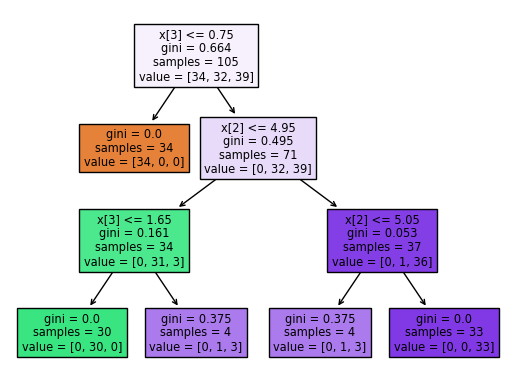

In [8]:
# Visualisation de l'arbre
tree.plot_tree(clf, filled=True)

In [9]:
# Prédiction et précision
print(f'Prédiction : {clf.predict(X_test)}\n')

print(f'Précision : {clf.score(X_test, y_test)}')

Prédiction : [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]

Précision : 0.9777777777777777


In [10]:
# On fait une division 5% apprentissage et 95% test
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.95, random_state=0)

for mdepth in [1, 2, 3, 4, 5, 6, 7]:
    clf = tree.DecisionTreeClassifier(max_depth=mdepth)
    clf = clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

for msplit in [2, 3, 5, 10, 15, 20]:
    clf = tree.DecisionTreeClassifier(min_samples_split=msplit)
    clf = clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

0.6573426573426573
0.951048951048951
0.8881118881118881
0.7552447552447552
0.951048951048951
0.7552447552447552
0.8881118881118881
0.8881118881118881
0.951048951048951
0.6573426573426573
0.32167832167832167
0.32167832167832167
0.32167832167832167


In [11]:
# On fait une division 70% apprentissage et 30% test
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.30, random_state=0)

# On fait une recherche par grille pour trouver les valeurs des parmarètres max_depth et min_samples_leaf optimaux
pgrid = {"max_depth": [1, 2, 3, 4, 5, 6, 7],
      "min_samples_split": [2, 3, 5, 10, 15, 20]}
grid_search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=pgrid, cv=10)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_.score(X_test, y_test)

0.9777777777777777

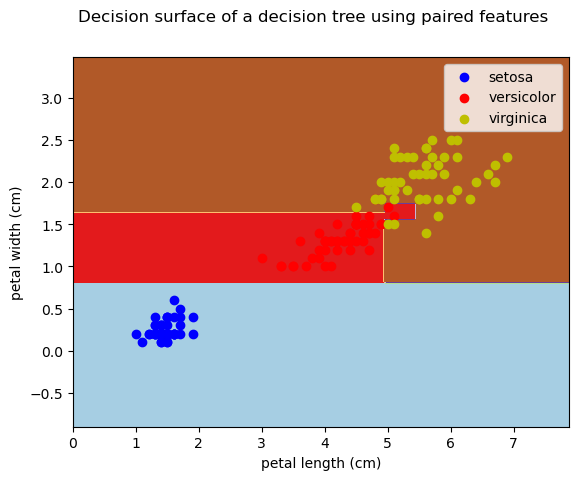

In [12]:
# Affichage de la surface de décision
# Paramètres
n_classes = 3
plot_colors = "bry" # blue-red-yellow
plot_step = 0.02

# Choisir les attributs longueur et largeur des pétales
pair = [2, 3]

# On ne garde seulement les deux attributs
X = iris.data[:, pair]
y = iris.target

# Apprentissage de l'arbre
clf = tree.DecisionTreeClassifier().fit(X, y)

# Affichage de la surface de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

# Affichage des points d'apprentissage
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i])
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()